In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import os
import urllib
%matplotlib inline
import matplotlib.pyplot as plt
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from nba_clean;"
    nba_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [2]:
print(nba_df)

     SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0      2014-15     Aaron Gordon               ORL  19.0  47.0  14.0  33.0   
1      2015-16     Aaron Gordon               ORL  20.0  78.0  32.0  46.0   
2      2016-17     Aaron Gordon               ORL  21.0  80.0  29.0  51.0   
3      2017-18     Aaron Gordon               ORL  22.0  58.0  19.0  39.0   
4      2018-19     Aaron Gordon               ORL  23.0  78.0  40.0  38.0   
...        ...              ...               ...   ...   ...   ...   ...   
2797   2021-22  Ziaire Williams               MEM  20.0  62.0  41.0  21.0   
2798   2019-20  Zion Williamson               NOP  19.0  24.0  11.0  13.0   
2799   2020-21  Zion Williamson               NOP  20.0  61.0  29.0  32.0   
2800   2019-20   Zylan Cheatham               NOP  24.0   4.0   2.0   2.0   
2801   2021-22   Zylan Cheatham               UTA  26.0   1.0   0.0   1.0   

      W_PCT          MIN    FGM  ...  STL_ESPN  BLK_ESPN  TOV_ESPN  PF_ESPN

In [3]:
#df = nba_df[nba_df['PLAYER_NAME'].str.contains('Miye Oni')]
#print(df)

In [4]:
for col in nba_df.columns:
    print(col)

SEASON_ID
PLAYER_NAME
TEAM_ABBREVIATION
AGE
GP
W
L
W_PCT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
DD2
TD3
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
NBA_FANTASY_PTS_PER_SEASON_RANK
DD2_RANK
TD3_RANK
count
GP_ESPN
FGM_ESPN
FGA_ESPN
FTM_ESPN
FTA_ESPN
FG3M_ESPN
REB_ESPN
OREB_ESPN
DREB_ESPN
AST_ESPN
STL_ESPN
BLK_ESPN
TOV_ESPN
PF_ESPN
DD2_ESPN
TD3_ESPN
PTS_ESPN
W_ESPN
NET_ESPN
AVG_NET_ESPN


In [5]:
column_list = list(nba_df)
print(column_list)

['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_PER_SEASON_RANK', 'DD2_RANK', 'TD3_RANK', 'count', 'GP_ESPN', 'FGM_ESPN', 'FGA_ESPN', 'FTM_ESPN', 'FTA_ESPN', 'FG3M_ESPN', 'REB_ESPN', 'OREB_ESPN', 'DREB_ESPN', 'AST_ESPN', 'STL_ESPN', 'BLK_ESPN', 'TOV_ESPN', 'PF_ESPN', 'DD2_ESPN', 'TD3_ESPN', 'PTS_ESPN', 'W_ESPN', 'NET_ESPN', 'AVG_NET_ESPN']


In [6]:
fantasy_df = nba_df.copy()

In [7]:
col = ['GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_PER_SEASON_RANK', 'DD2_RANK', 'TD3_RANK', 'count', 'GP_ESPN', 'FGM_ESPN', 'FGA_ESPN', 'FTM_ESPN', 'FTA_ESPN', 'FG3M_ESPN', 'REB_ESPN', 'OREB_ESPN', 'DREB_ESPN', 'AST_ESPN', 'STL_ESPN', 'BLK_ESPN', 'TOV_ESPN', 'PF_ESPN', 'DD2_ESPN', 'TD3_ESPN', 'PTS_ESPN', 'W_ESPN', 'NET_ESPN', 'AVG_NET_ESPN', 'PER']

fantasy_df = fantasy_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3']]

In [8]:

pd.set_option('display.max_columns', None)


In [9]:
print(fantasy_df)

     SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0      2014-15     Aaron Gordon               ORL  19.0  47.0  14.0  33.0   
1      2015-16     Aaron Gordon               ORL  20.0  78.0  32.0  46.0   
2      2016-17     Aaron Gordon               ORL  21.0  80.0  29.0  51.0   
3      2017-18     Aaron Gordon               ORL  22.0  58.0  19.0  39.0   
4      2018-19     Aaron Gordon               ORL  23.0  78.0  40.0  38.0   
...        ...              ...               ...   ...   ...   ...   ...   
2797   2021-22  Ziaire Williams               MEM  20.0  62.0  41.0  21.0   
2798   2019-20  Zion Williamson               NOP  19.0  24.0  11.0  13.0   
2799   2020-21  Zion Williamson               NOP  20.0  61.0  29.0  32.0   
2800   2019-20   Zylan Cheatham               NOP  24.0   4.0   2.0   2.0   
2801   2021-22   Zylan Cheatham               UTA  26.0   1.0   0.0   1.0   

      W_PCT          MIN    FGM     FGA  FG_PCT   FG3M   FG3A  FG3_PCT    F

In [10]:
from sqlalchemy import create_engine
from pandas.io import sql
import pymysql
import mysql.connector

In [11]:
mydb = mysql.connector.connect(
  host=os.environ.get("DB_HOST"),
  user=os.environ.get("DB_USER"),
  password=os.environ.get("DB_PASSWORD"),
  database=os.environ.get("DB_NAME")
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS nba_orignal"

mycursor.execute(sql)

In [12]:
# Credentials to database connection
hostname=os.environ.get("DB_HOST")
dbname=os.environ.get("DB_NAME")
uname=os.environ.get("DB_USER")
pwd=os.environ.get("DB_PASSWORD")

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))
fantasy_df.to_sql('nba_orignal', engine, index=False)
mydb.close()

In [13]:
#column_list2 = list(fantasy_df)
#print(column_list2)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [15]:
#filter_data = fantasy_df[fantasy_df['PLAYER_NAME']=='Aaron Gordon']

In [16]:
#filter_data

In [17]:
#df2 = {'SEASON_ID':'2022-23','PLAYER_ID':203932,'PLAYER_NAME':'Aaron Gordon','TEAM_ABBREVIATION':'DEN','AGE':27}

In [18]:
#filter_data = filter_data.append(df2, ignore_index = True)

In [19]:
#filter_data

In [20]:
#filtered_data = filter_data.drop('PLAYER_NAME', 1)
#filtered_data = filter_data.drop('PLAYER_ID', 1)
#filtered_data = filter_data.drop('TEAM_ABBREVIATION', 1)
#filtered_data = filter_data.drop('SEASON_ID', 1)

#filtered_data = filter_data.iloc[:-1 , :]
#filtered_data

In [21]:
#column_list2 = list(filtered_data)
#print(column_list2)

In [22]:
#X = filtered_data[['AGE']].values
#x = np.repeat(X, 1)
#print(X)
#print('a')
#print(x)

In [23]:
#y = filtered_data[['GP']].values
#print(y)

In [24]:
#print(y)

In [25]:
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [26]:
#ml=LinearRegression()
#ml.fit(x_train,y_train)

In [27]:
#y_pred=ml.predict(x_test)
#print(y_pred)

In [28]:
#y_pred = y_pred.flatten()

#y_pred

In [29]:
#pred_y_df = pd.DataFrame({"AGE":27, 'GP':y_pred})
#pred_y_df['GP']= pred_y_df['GP'].round(decimals = 0)
#pred_y_df

In [30]:
#gp = pred_y_df["GP"].tolist()

In [31]:
#filter_data.iloc[8,4] = gp
#filter_data

In [32]:
#last_row = filter_data.tail(1)
#last_row
#f_df = fantasy_df.append(last_row, ignore_index = True)
#f_df

In [33]:
#fantasy_df['AGE'][fantasy_df.index[-1]]


In [34]:
f_df = pd.DataFrame()
df = nba_df['count'] >= 1
nb_df = nba_df[df]
player_names = pd.unique(nb_df[['PLAYER_NAME']].values.ravel())
#i = 0
#leng = len(player_names)
#while i <= leng-1:
for players in player_names:
    filter_data = fantasy_df[fantasy_df['PLAYER_NAME']== players]
    df2 = {'SEASON_ID':'2022-23','PLAYER_NAME':players,'TEAM_ABBREVIATION':filter_data['TEAM_ABBREVIATION'][filter_data.index[-1]],'AGE':(filter_data['AGE'][filter_data.index[-1]]+1)}
    filter_data = filter_data.append(df2, ignore_index = True)
    #print(filter_data)
    #filtered_data = filter_data.drop(['TEAM_ABBREVIATION', 'PLAYER_NAME', 'SEASON_ID'],axis = 1, inplace=True)
    filtered_data = filter_data.iloc[:-1 , :]
    #print(filtered_data)
    stats_list = list(filtered_data)
    #print(stats_list)
    j = 4
    length = len(stats_list)
    #print(players)
    while j <= length-1:
    #for stats in stats_list:
        stat = stats_list[j]
        #print(stat)
        X = filtered_data[['AGE']].values
        #X = X.reshape(1, -1)
        #print(X)
        y = filtered_data[[stat]].values
        #y = y.reshape(1, -1)
        #print(y)
        if len(X) == 1:
            X = np.repeat(X, 2)
            X = X.reshape(-1,1)
            y = np.repeat(y, 2)
            y = y.reshape(-1,1)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
        ml=LinearRegression()
        ml.fit(x_train,y_train)
        y_pred=ml.predict(x_test)
        y_pred = y_pred.flatten()
        pred_y_df = pd.DataFrame({"AGE":filter_data['AGE'][filter_data.index[-1]], stat:y_pred})
        pred_y_df[stat]= pred_y_df[stat].round(decimals = 0)
        st = pred_y_df[stat].tolist()
        value = st[0]
        size = len(filter_data)-1
        index = filter_data.columns.get_loc(stat)
        filter_data.iloc[size,index] = value
        j+=1
    last_row = filter_data.tail(1)
    f_df = f_df.append(last_row, ignore_index = True)
    print(players)
    #i+=1
    #print(i)
print(f_df)
    

Aaron Gordon
Aaron Henry
Aaron Holiday
Aaron Nesmith
Aaron Wiggins
Abdel Nader
Admiral Schofield
Al Horford
Al-Farouq Aminu
Alec Burks
Alekesej Pokusevski
Alex Caruso
Alex Len
Alize Johnson
Alperen Sengun
Amir Coffey
Andre Drummond
Andre Iguodala
Andrew Wiggins
Anfernee Simons
Anthony Davis
Anthony Edwards
Anthony Gill
Anthony Lamb
Armoni Brooks
Arnoldas Kulboka
Austin Reaves
Austin Rivers
Avery Bradley
Ayo Dosunmu
Bam Adebayo
Ben McLemore
Ben Simmons
Blake Griffin
Boban Marjanovic
Bobby Portis
Bogdan Bogdanovic
Bojan Bogdanovic
Bol Bol
Bones Hyland
Bradley Beal
Brandon Boston
Brandon Clarke
Brandon Ingram
Brian Bowen II
Brodric Thomas
Brook Lopez
Bruce Brown
Bruno Fernando
Bryn Forbes
Buddy Hield
CJ Elleby
CJ McCollum
Cade Cunningham
Caleb Martin
Cam Reddish
Cam Thomas
Cameron Johnson
Cameron Oliver
Cameron Payne
Caris LeVert
Carlik Jones
Carmelo Anthony
Cassius Stanley
Cassius Winston
Cedi Osman
Chandler Hutchison
Charles Bassey
Chasson Randle
Chaundee Brown Jr.
Chimezie Metu
Chris B

In [35]:
#f_df.loc[f_df['GP'] >= 83]

In [36]:
f_df['W_PCT'] = f_df['W'] / f_df['GP']
f_df['W_PCT'] = f_df['W_PCT'].round(decimals = 3)
f_df['FG_PCT'] = f_df['FGM'] / f_df['FGA']
f_df['FG_PCT'] = f_df['FG_PCT'].round(decimals = 3)
f_df['FG3_PCT'] = f_df['FG3M'] / f_df['FG3A']
f_df['FG3_PCT'] = f_df['FG3_PCT'].round(decimals = 3)
f_df['FT_PCT'] = f_df['FTM'] / f_df['FTA']
f_df['FT_PCT'] = f_df['FT_PCT'].round(decimals = 3)
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3
0,2022-23,Aaron Gordon,DEN,27.0,73.0,40.0,33.0,0.548,2457.0,447.0,945.0,0.473,103.0,311.0,0.331,181.0,252.0,0.718,123.0,385.0,508.0,232.0,137.0,54.0,47.0,52.0,150.0,231.0,1179.0,151.0,15.0,0.0
1,2022-23,Aaron Henry,PHI,23.0,6.0,6.0,0.0,1.000,17.0,1.0,5.0,0.200,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,-20.0,0.0,0.0
2,2022-23,Aaron Holiday,PHX,26.0,62.0,36.0,26.0,0.581,1138.0,168.0,391.0,0.430,53.0,140.0,0.379,61.0,71.0,0.859,21.0,103.0,124.0,164.0,69.0,43.0,12.0,20.0,97.0,83.0,450.0,25.0,1.0,0.0
3,2022-23,Aaron Nesmith,BOS,23.0,46.0,22.0,24.0,0.478,669.0,78.0,178.0,0.438,40.0,108.0,0.370,22.0,28.0,0.786,28.0,99.0,127.0,23.0,23.0,15.0,9.0,12.0,87.0,29.0,218.0,-7.0,0.0,0.0
4,2022-23,Aaron Wiggins,OKC,24.0,50.0,13.0,37.0,0.260,1209.0,156.0,337.0,0.463,42.0,138.0,0.304,62.0,85.0,0.729,51.0,127.0,178.0,68.0,54.0,30.0,10.0,21.0,93.0,63.0,416.0,-235.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2022-23,Zach LaVine,CHI,28.0,56.0,26.0,30.0,0.464,2025.0,518.0,1112.0,0.466,166.0,431.0,0.385,287.0,345.0,0.832,29.0,249.0,277.0,251.0,168.0,54.0,24.0,74.0,111.0,242.0,1489.0,-89.0,1.0,0.0
566,2022-23,Zeke Nnaji,DEN,22.0,42.0,30.0,12.0,0.714,397.0,50.0,104.0,0.481,24.0,59.0,0.407,12.0,15.0,0.800,14.0,51.0,65.0,10.0,7.0,8.0,4.0,8.0,29.0,15.0,136.0,-82.0,0.0,0.0
567,2022-23,Ziaire Williams,MEM,21.0,62.0,41.0,21.0,0.661,1346.0,191.0,424.0,0.450,76.0,242.0,0.314,43.0,55.0,0.782,26.0,103.0,129.0,65.0,41.0,35.0,12.0,17.0,113.0,51.0,501.0,122.0,0.0,0.0
568,2022-23,Zion Williamson,NOP,21.0,24.0,11.0,13.0,0.458,668.0,210.0,360.0,0.583,6.0,14.0,0.429,114.0,178.0,0.640,64.0,86.0,150.0,50.0,59.0,16.0,9.0,39.0,42.0,133.0,540.0,62.0,2.0,0.0


In [37]:
col_name = ['GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK','DD2_RANK', 'TD3_RANK']
col_rank = ['GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3']
#print(len(col_name))
#print(len(col_rank))
for (name,rank) in zip(col_name, col_rank):
    f_df[name] = f_df.groupby(['SEASON_ID'])[rank].rank(ascending = False)
    f_df[name] = f_df[name].round(decimals = 0)
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  73.0  40.0  33.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  62.0  36.0  26.0   
3     2022-23    Aaron Nesmith               BOS  23.0  46.0  22.0  24.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  56.0  26.0  30.0   
566   2022-23       Zeke Nnaji               DEN  22.0  42.0  30.0  12.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  24.0  11.0  13.0   
569   2022-23   Zylan Cheatham               UTA  27.0   4.0   2.0   2.0   

     W_PCT     MIN    FGM     FGA  FG_PCT   FG3M   FG3A  FG3_PCT    FTM  \
0    0.548  

In [38]:
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from espn_scoring;"
    espn_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [39]:
all_names = f_df["PLAYER_NAME"].tolist()
length_n = len(all_names)
print(length_n)
df_repeated = pd.concat([espn_df]*length_n, ignore_index=True)

570


In [40]:
print(df_repeated.tail())

     GP_ESPN  FGM_ESPN  FGA_ESPN  FTM_ESPN  FTA_ESPN  FG3M_ESPN  REB_ESPN  \
565      0.0       2.0      -1.0       1.0      -1.0        1.0       1.0   
566      0.0       2.0      -1.0       1.0      -1.0        1.0       1.0   
567      0.0       2.0      -1.0       1.0      -1.0        1.0       1.0   
568      0.0       2.0      -1.0       1.0      -1.0        1.0       1.0   
569      0.0       2.0      -1.0       1.0      -1.0        1.0       1.0   

     OREB_ESPN  DREB_ESPN  AST_ESPN  STL_ESPN  BLK_ESPN  TOV_ESPN  PF_ESPN  \
565        0.0        0.0       2.0       4.0       4.0      -2.0      0.0   
566        0.0        0.0       2.0       4.0       4.0      -2.0      0.0   
567        0.0        0.0       2.0       4.0       4.0      -2.0      0.0   
568        0.0        0.0       2.0       4.0       4.0      -2.0      0.0   
569        0.0        0.0       2.0       4.0       4.0      -2.0      0.0   

     DD2_ESPN  TD3_ESPN  PTS_ESPN  W_ESPN  
565       0.0       0.0 

In [41]:
df_repeated["PLAYER_NAME"] = all_names

In [42]:
columns_list = [
                "PLAYER_NAME",
                "GP_ESPN",
                "FGM_ESPN",
                "FGA_ESPN",
                "FTM_ESPN",
                "FTA_ESPN",
                "FG3M_ESPN",
                "REB_ESPN",
                "OREB_ESPN",
                "DREB_ESPN",
                "AST_ESPN",
                "STL_ESPN",
                "BLK_ESPN",
                "TOV_ESPN",
                "PF_ESPN",
                "DD2_ESPN",
                "TD3_ESPN",
                "PTS_ESPN",
                "W_ESPN"
               ]
df_repeated = df_repeated.reindex(columns = columns_list)
#print(df_repeated)

In [43]:
f_df = pd.merge(f_df, df_repeated, how = 'right', on = 'PLAYER_NAME')
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,DD2_RANK,TD3_RANK,GP_ESPN,FGM_ESPN,FGA_ESPN,FTM_ESPN,FTA_ESPN,FG3M_ESPN,REB_ESPN,OREB_ESPN,DREB_ESPN,AST_ESPN,STL_ESPN,BLK_ESPN,TOV_ESPN,PF_ESPN,DD2_ESPN,TD3_ESPN,PTS_ESPN,W_ESPN
0,2022-23,Aaron Gordon,DEN,27.0,73.0,40.0,33.0,0.548,2457.0,447.0,945.0,0.473,103.0,311.0,0.331,181.0,252.0,0.718,123.0,385.0,508.0,232.0,137.0,54.0,47.0,52.0,150.0,231.0,1179.0,151.0,15.0,0.0,58.0,79.0,137.0,214.0,27.0,54.0,60.0,184.0,113.0,90.0,314.0,72.0,60.0,371.0,56.0,41.0,46.0,80.0,64.0,150.0,80.0,59.0,119.0,51.0,58.0,73.0,52.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
1,2022-23,Aaron Henry,PHI,23.0,6.0,6.0,0.0,1.000,17.0,1.0,5.0,0.200,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,-20.0,0.0,0.0,524.0,493.0,556.0,11.0,541.0,542.0,538.0,549.0,534.0,531.0,531.0,548.0,547.0,NaN,550.0,550.0,551.0,554.0,522.0,547.0,478.0,492.0,532.0,552.0,546.0,317.0,431.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
2,2022-23,Aaron Holiday,PHX,26.0,62.0,36.0,26.0,0.581,1138.0,168.0,391.0,0.430,53.0,140.0,0.379,61.0,71.0,0.859,21.0,103.0,124.0,164.0,69.0,43.0,12.0,20.0,97.0,83.0,450.0,25.0,1.0,0.0,200.0,130.0,269.0,176.0,284.0,282.0,266.0,347.0,236.0,254.0,111.0,249.0,281.0,84.0,374.0,340.0,352.0,130.0,222.0,215.0,314.0,273.0,263.0,244.0,280.0,192.0,273.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
3,2022-23,Aaron Nesmith,BOS,23.0,46.0,22.0,24.0,0.478,669.0,78.0,178.0,0.438,40.0,108.0,0.370,22.0,28.0,0.786,28.0,99.0,127.0,23.0,23.0,15.0,9.0,12.0,87.0,29.0,218.0,-7.0,0.0,0.0,348.0,312.0,310.0,316.0,376.0,390.0,388.0,323.0,280.0,290.0,142.0,400.0,410.0,236.0,313.0,346.0,349.0,426.0,390.0,398.0,365.0,365.0,298.0,403.0,386.0,280.0,431.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
4,2022-23,Aaron Wiggins,OKC,24.0,50.0,13.0,37.0,0.260,1209.0,156.0,337.0,0.463,42.0,138.0,0.304,62.0,85.0,0.729,51.0,127.0,178.0,68.0,54.0,30.0,10.0,21.0,93.0,63.0,416.0,-235.0,0.0,0.0,314.0,434.0,78.0,515.0,275.0,294.0,292.0,206.0,272.0,258.0,391.0,244.0,252.0,356.0,192.0,300.0,276.0,299.0,266.0,300.0,349.0,262.0,274.0,293.0,294.0,536.0,431.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2022-23,Zach LaVine,CHI,28.0,56.0,26.0,30.0,0.464,2025.0,518.0,1112.0,0.466,166.0,431.0,0.385,287.0,345.0,0.832,29.0,249.0,277.0,251.0,168.0,54.0,24.0,74.0,111.0,242.0,1489.0,-89.0,1.0,0.0,262.0,266.0,189.0,336.0,95.0,30.0,28.0,200.0,30.0,30.0,96.0,24.0,29.0,142.0,306.0,128.0,158.0,69.0,33.0,150.0,185.0,23.0,224.0,47.0,27.0,456.0,273.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
566,2022-23,Zeke Nnaji,DEN,22.0,42.0,30.0,12.0,0.714,397.0,50.0,104.0,0.481,24.0,59.0,0.407,12.0,15.0,0.800,14.0,51.0,65.0,10.0,7.0,8.0,4.0,8.0,29.0,15.0,136.0,-82.0,0.0,0.0,369.0,212.0,445.0,50.0,420.0,425.0,433.0,160.0,336.0,357.0,56.0,452.0,455.0,206.0,426.0,422.0,432.0,480.0,478.0,452.0,443.0,416.0,441.0,454.0,423.0,443.0,431.0,303.0,0.0,2.0,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,-2.0,0.0,0.0,0.0,1.0,0.0
567,2022-23,Ziaire Williams,MEM,21.0,62.0,41.0,21.0,0.661,1346.0,191.0,424.0,0.450,76.0,242.0,0.314,43.0,55.0,0.782,26.0,103.0,129.0,65.0,41.0,35.0,12.0,17.

In [44]:
share_columns = ["GP",
                "FGM",
                "FGA",
                "FTM",
                "FTA",
                "FG3M",
                "REB",
                "OREB",
                "DREB",
                "AST",
                "STL",
                "BLK",
                "TOV",
                "PF",
                "DD2",
                "TD3",
                "PTS",
                "W"]
for column in share_columns:
    f_df[column +"_ESPN"] = f_df[column] * f_df[column+"_ESPN"]
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  73.0  40.0  33.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  62.0  36.0  26.0   
3     2022-23    Aaron Nesmith               BOS  23.0  46.0  22.0  24.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  56.0  26.0  30.0   
566   2022-23       Zeke Nnaji               DEN  22.0  42.0  30.0  12.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  24.0  11.0  13.0   
569   2022-23   Zylan Cheatham               UTA  27.0   4.0   2.0   2.0   

     W_PCT     MIN    FGM     FGA  FG_PCT   FG3M   FG3A  FG3_PCT    FTM  \
0    0.548  

In [45]:
f_df['NET_ESPN'] = f_df['FGM_ESPN'] + f_df['FGA_ESPN'] + f_df['FTM_ESPN'] + f_df["FTA_ESPN"]+ f_df['FG3M_ESPN'] + f_df['REB_ESPN'] + f_df['OREB_ESPN'] + f_df['DREB_ESPN'] + f_df['AST_ESPN'] + f_df['STL_ESPN'] + f_df['BLK_ESPN'] + f_df['TOV_ESPN'] + f_df["PF_ESPN"] + f_df["DD2_ESPN"] + f_df["TD3_ESPN"] + f_df['PTS_ESPN'] + f_df['GP_ESPN'] + f_df['W_ESPN']

In [46]:
f_df['AVG_NET_ESPN'] = f_df['NET_ESPN'] / 82

In [47]:
f_df['NBA_FANTASY_PTS_RANK_ESPN'] = f_df.groupby(["SEASON_ID"])["AVG_NET_ESPN"].rank(ascending = False)

In [48]:
f_df['PER'] = (f_df['FGM'] * 85.910 + f_df['STL'] * 53.897 + f_df['FG3M'] * 51.757 + f_df['FTM'] * 46.845 + f_df['BLK'] * 39.190 + f_df['OREB'] * 39.190 + f_df['AST'] * 34.677 + f_df['DREB'] * 14.707 - f_df['PF'] * 17.174 - (f_df['FTA'] - f_df['FTM']) * 20.091 - (f_df["FGA"] - f_df["FGM"]) * 39.190 - f_df['TOV'] * 53.897)* (1 / f_df['MIN'])
f_df['PER'] = f_df['PER'].round(decimals = 3)

In [49]:
f_df['PER_RANK'] = f_df.groupby(["SEASON_ID"])["PER"].rank(ascending = False)

In [50]:
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  73.0  40.0  33.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  62.0  36.0  26.0   
3     2022-23    Aaron Nesmith               BOS  23.0  46.0  22.0  24.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  56.0  26.0  30.0   
566   2022-23       Zeke Nnaji               DEN  22.0  42.0  30.0  12.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  24.0  11.0  13.0   
569   2022-23   Zylan Cheatham               UTA  27.0   4.0   2.0   2.0   

     W_PCT     MIN    FGM     FGA  FG_PCT   FG3M   FG3A  FG3_PCT    FTM  \
0    0.548  

In [51]:
f_df.sort_values(by = ['NBA_FANTASY_PTS_RANK_ESPN'], inplace = True)


In [52]:
column_espn = list(f_df)
print(column_espn)


['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK', 'GP_ESPN', 'FGM_ESPN', 'FGA_ESPN', 'FTM_ESPN', 'FTA_ESPN', 'FG3M_ESPN', 'REB_ESPN', 'OREB_ESPN', 'DREB_ESPN', 'AST_ESPN', 'STL_ESPN', 'BLK_ESPN', 'TOV_ESPN', 'PF_ESPN', 'DD2_ESPN', 'TD3_ESPN', 'PTS_ESPN', 'W_ESPN', 'NET_ESPN', 'AVG_NET_ESPN', 'NBA_FANTASY_PTS_RANK_ESPN', 'PER', 'PER_RANK']


In [53]:
f_espn_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE','NET_ESPN', 'AVG_NET_ESPN', 'NBA_FANTASY_PTS_RANK_ESPN']]
stats_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK']]

In [54]:
from sqlalchemy import create_engine
from pandas.io import sql
import pymysql
import mysql.connector

In [55]:
mydb = mysql.connector.connect(
  host=os.environ.get("DB_HOST"),
  user=os.environ.get("DB_USER"),
  password=os.environ.get("DB_PASSWORD"),
  database=os.environ.get("DB_NAME")
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS espn_pred_linear"

mycursor.execute(sql)

In [56]:
# Credentials to database connection
hostname=os.environ.get("DB_HOST")
dbname=os.environ.get("DB_NAME")
uname=os.environ.get("DB_USER")
pwd=os.environ.get("DB_PASSWORD")

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))
f_espn_df.to_sql('espn_pred_linear', engine, index=False)
mydb.close()

<AxesSubplot:xlabel='PLAYER_NAME'>

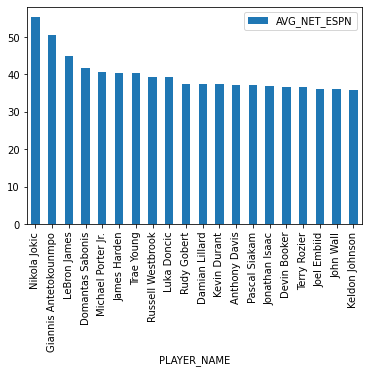

In [57]:
mvp_cutoff = 20
top_mvp_rankings_df = f_df[f_df['NBA_FANTASY_PTS_RANK_ESPN'] <= mvp_cutoff]
top_mvp_rankings_df.plot.bar(x = "PLAYER_NAME", y = "AVG_NET_ESPN")